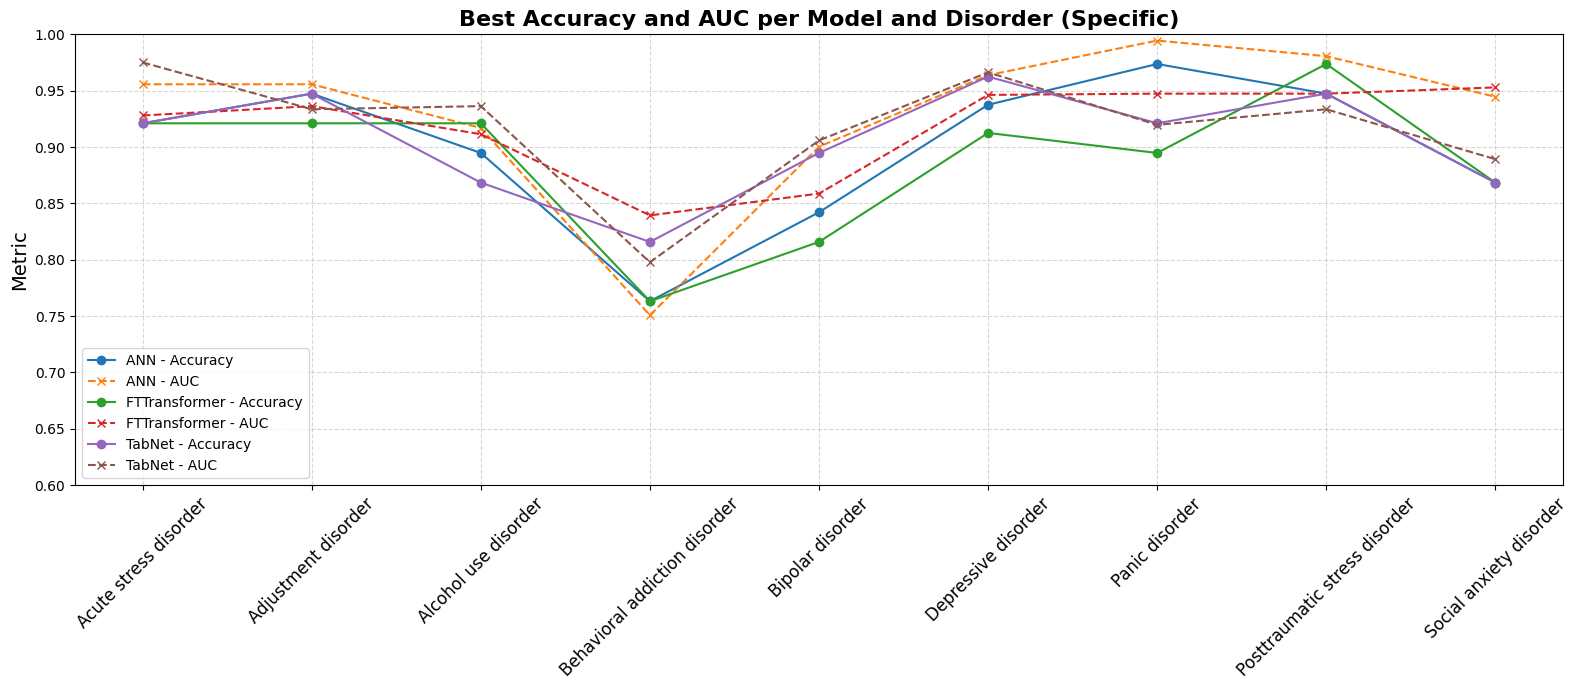

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the CSVs
df_ann_spec = pd.read_csv('./binary_classification_specifc_disorder_ann.csv')
df_fttransformer_spec = pd.read_csv('./binary_classification_specific_disorder_fttransformer.csv')
df_tabnet_spec = pd.read_csv('./binary_classification_specifc_disorder_tabnet1.csv')

# 2. Add a column identifying the model
df_ann_spec['Model'] = 'ANN'
df_fttransformer_spec['Model'] = 'FTTransformer'
df_tabnet_spec['Model'] = 'TabNet'

# 3. Select the row with the highest Accuracy for each Disorder within each model
best_ann = df_ann_spec.loc[df_ann_spec.groupby('Disorder')['Accuracy'].idxmax()]
best_ftt = df_fttransformer_spec.loc[df_fttransformer_spec.groupby('Disorder')['Accuracy'].idxmax()]
best_tabnet = df_tabnet_spec.loc[df_tabnet_spec.groupby('Disorder')['Accuracy'].idxmax()]

# 4. Combine the best results into one DataFrame
df_best_spec = pd.concat([best_ann, best_ftt, best_tabnet], ignore_index=True)

# 5. Build metric dictionaries
def build_metrics_per_disorder(df):
    accuracy = {}
    auc = {}
    for disorder in sorted(df['Disorder'].unique()):
        data = df[df['Disorder'] == disorder].sort_values('Model')
        accuracy[disorder] = data['Accuracy'].tolist()
        auc[disorder] = data['AUC'].tolist()
    return accuracy, auc

accuracy_spec, auc_spec = build_metrics_per_disorder(df_best_spec)

# 6. Prepare the plot
labels = list(accuracy_spec.keys())
models = ['ANN', 'FTTransformer', 'TabNet']
x = np.arange(len(labels))

plt.figure(figsize=(16, 7))

for i, model in enumerate(models):
    acc_vals = [accuracy_spec[label][i] for label in labels]
    auc_vals = [auc_spec[label][i] for label in labels]
    plt.plot(x, acc_vals, marker='o', linestyle='-', label=f'{model} - Accuracy')
    plt.plot(x, auc_vals, marker='x', linestyle='--', label=f'{model} - AUC')

plt.xticks(x, labels, rotation=45, fontsize=12)
plt.ylim(0.6, 1.0)
plt.ylabel('Metric', fontsize=14)
plt.title('Best Accuracy and AUC per Model and Disorder (Specific)', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison_specific_disorder.png', dpi=300)
plt.show()


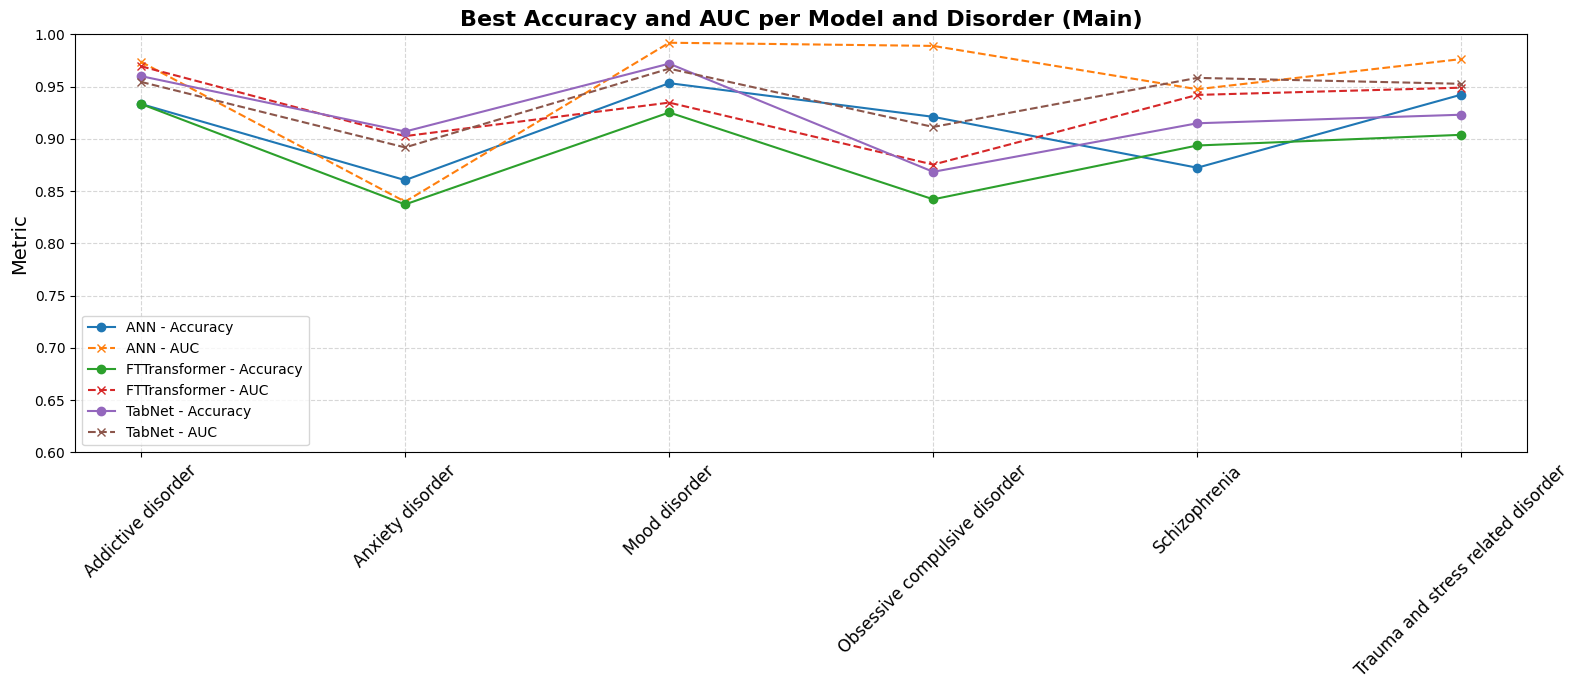

In [2]:
# 1. Load the CSVs
df_ann_main = pd.read_csv('./binary_classification_main_disorder_ann.csv')
df_fttransformer_main = pd.read_csv('./binary_classification_main_disorder_fttransformer.csv')
df_tabnet_main = pd.read_csv('./binary_classification_main_disorder_tabnet1.csv')

# 2. Add a column identifying the model
df_ann_main['Model'] = 'ANN'
df_fttransformer_main['Model'] = 'FTTransformer'
df_tabnet_main['Model'] = 'TabNet'

# 3. Select the row with the highest Accuracy for each Disorder within each model
best_ann = df_ann_main.loc[df_ann_main.groupby('Disorder')['Accuracy'].idxmax()]
best_ftt = df_fttransformer_main.loc[df_fttransformer_main.groupby('Disorder')['Accuracy'].idxmax()]
best_tabnet = df_tabnet_main.loc[df_tabnet_main.groupby('Disorder')['Accuracy'].idxmax()]

# 4. Combine the best results into one DataFrame
df_best = pd.concat([best_ann, best_ftt, best_tabnet], ignore_index=True)

# 5. Build metric dictionaries
def build_metrics_per_disorder(df):
    accuracy = {}
    auc = {}
    for disorder in sorted(df['Disorder'].unique()):
        data = df[df['Disorder'] == disorder].sort_values('Model')
        accuracy[disorder] = data['Accuracy'].tolist()
        auc[disorder] = data['AUC'].tolist()
    return accuracy, auc

accuracy_main, auc_main = build_metrics_per_disorder(df_best)

# 6. Prepare the plot
labels = list(accuracy_main.keys())
models = ['ANN', 'FTTransformer', 'TabNet']
x = np.arange(len(labels))

plt.figure(figsize=(16, 7))

for i, model in enumerate(models):
    acc_vals = [accuracy_main[label][i] for label in labels]
    auc_vals = [auc_main[label][i] for label in labels]
    plt.plot(x, acc_vals, marker='o', linestyle='-', label=f'{model} - Accuracy')
    plt.plot(x, auc_vals, marker='x', linestyle='--', label=f'{model} - AUC')

plt.xticks(x, labels, rotation=45, fontsize=12)
plt.ylim(0.6, 1.0)
plt.ylabel('Metric', fontsize=14)
plt.title('Best Accuracy and AUC per Model and Disorder (Main)', fontsize=16, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('model_comparison_main_disorder.png', dpi=300)
plt.show()
